# Myeloid cells

In [1]:
import scanpy as sc
from tidyverse.dummy import *

from sctools.scplotting import recolor
import gc
import pertpy as pt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
from sctools.composition import compositional_pca, plot_pca_loadings
plt.rcParams["figure.figsize"] = (4,3)

from prop_utils import annotate_qval_to_scCODA_result, renamer

import sys
sys.path.append('..')
from util import load_celltype
from colormaps import color_dict_diagnosis, cmap_subtypes
from matplotlib.colors import ListedColormap

Importing tidyverse


/tmp/ipykernel_149650/1820022867.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


In [2]:
mkdir /tmp/proportions

mkdir: cannot create directory ‘/tmp/proportions’: File exists


In [3]:
plotfolder = '/tmp/proportions/Myeloid_proportions/'
import os 
if not os.path.exists(plotfolder):
    os.mkdir(plotfolder)

# SCCODA

In [4]:
A = load_celltype('Myeloid')
A.obs.diagnosis = pd.Categorical(A.obs.diagnosis)

recolor(A, 'diagnosis', color_dict_diagnosis)

In [5]:
diagnosis_ordered = ['NE', 'M','D','T', 'NS']

In [6]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    A,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="leiden",
    sample_identifier="samplename",
    covariate_obs=['samplename','diagnosis', 'procedure', 'patient'],
)
sccoda_data["coda"].obs['n_cells'] = sccoda_data["coda"].X.sum(1)
sccoda_data["coda"].obs['diagnosis'] = pd.Categorical(sccoda_data["coda"].obs['diagnosis'], diagnosis_ordered)

data_scanpy_1 = sccoda_data["coda"]

/tmp/ipykernel_149650/1568304063.py:1: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


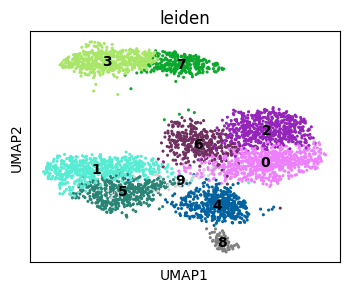

In [7]:
set_matplotlib_formats('png')
sc.pl.umap(A, color=['leiden'], legend_loc='on data', size=20, vmax=10) # Neutrophils

In [8]:
# cluster_order = A.obs.leiden.cat.categories
cluster_order = ['1','5', 
                '0','2','6',
                '4',
                '3','7',
                '8','9']

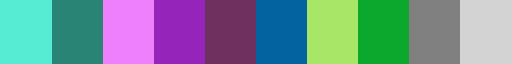

In [10]:
# reorder a little,
_cm_colors= cmap_subtypes.colors + ['lightgrey']
_cm_colors = np.array(_cm_colors)[[0,1, 
                                   10,11,12,
                                   7,
                                   2,3, 13, 14
                                  ]]
cmap_subtypes = ListedColormap(
    _cm_colors
)
cmap_subtypes

In [11]:
leiden_color_dict = dict(zip(cluster_order, cmap_subtypes.colors ))

In [12]:
_tmp = [leiden_color_dict[c] for c in A.obs.leiden.cat.categories]

if not 'leiden_colors_backup' in A.uns:
    A.uns['leiden_colors_backup']= A.uns['leiden_colors']
A.uns['leiden_colors'] = _tmp

/tmp/ipykernel_149650/1568304063.py:1: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


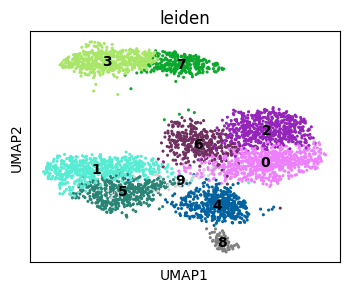

In [13]:
set_matplotlib_formats('png')
sc.pl.umap(A, color=['leiden'], legend_loc='on data', size=20, vmax=10) # Neutrophils

/tmp/ipykernel_149650/2410518934.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


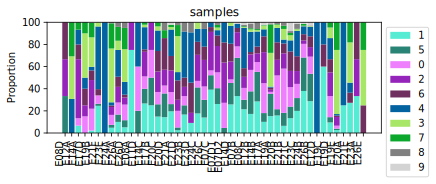

In [14]:
order = []
for d in diagnosis_ordered:
    order.extend(sorted(A.obs.query('diagnosis==@d').samplename.unique()))

set_matplotlib_formats('svg')
fig = sccoda_model.plot_stacked_barplot(
    data_scanpy_1[:, cluster_order],
    modality_key="coda",
    feature_name="samples",
    figsize=(6,2), show=False, palette=cmap_subtypes,
    level_order=order
)
plt.xticks(rotation=90);
fig.figure.savefig(f'{plotfolder}/Myeloid_proportions_per_sample.svg')

## CODA-PCA

/tmp/ipykernel_149650/1696545352.py:1: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 46/46 [00:00<00:00, 1466.81it/s]


<Axes: xlabel='leiden'>

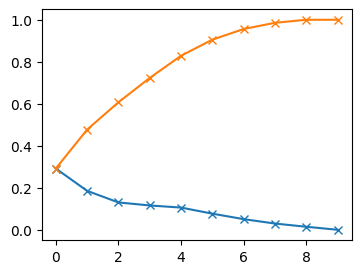

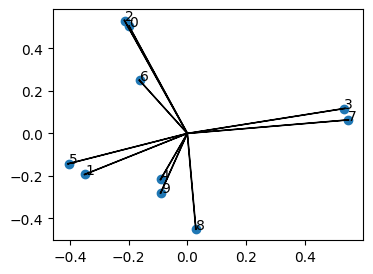

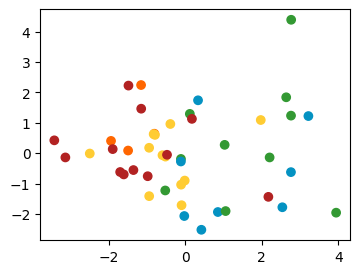

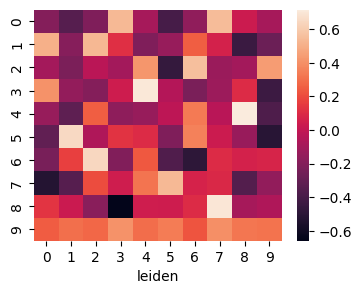

In [15]:
set_matplotlib_formats('png')
pca, scaler, x_pca_posterior, principal_components_df = compositional_pca(data_scanpy_1)
plt.plot(pca.explained_variance_ratio_, 'x-')
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'x-')

# plot_pca_with_uncertainty()
plt.figure()
plot_pca_loadings(principal_components_df)

plt.figure()
plt.scatter(x_pca_posterior[:,0], x_pca_posterior[:,1], c=[color_dict_diagnosis[_] for _ in data_scanpy_1.obs.diagnosis])

plt.figure()
sns.heatmap(principal_components_df)

In [16]:
set_matplotlib_formats('png')

/tmp/ipykernel_149650/2623958728.py:1: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


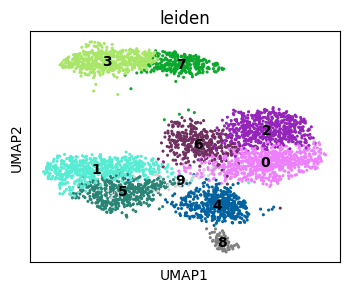

In [17]:
sc.pl.umap(A, color=['leiden'], legend_loc='on data', size=20, show=False)
plt.savefig(f'{plotfolder}/Myeloid_umap.png')

/tmp/ipykernel_149650/2241776021.py:1: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


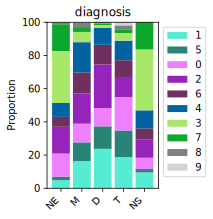

In [18]:
set_matplotlib_formats('svg')
fig = sccoda_model.plot_stacked_barplot(
    data_scanpy_1[:, cluster_order],
    modality_key="coda",
    feature_name="diagnosis",
    figsize=(2,3), show=False, palette=cmap_subtypes
)
fig.figure.savefig(f'{plotfolder}/Myeloid_proportions_per_diagnosis.svg')

In [19]:
set_matplotlib_formats('png')

/tmp/ipykernel_149650/2623958728.py:1: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 2 x 1 in image.
/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: /tmp/proportions/Myeloid_proportions//proportions_per_diagnosis_ncells.svg


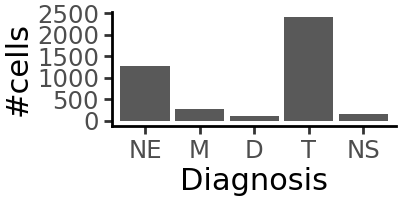

In [20]:
p = pn.ggplot(pd.DataFrame({'n_cells': data_scanpy_1.obs.groupby('diagnosis').n_cells.sum()}).reset_index(), pn.aes(x='diagnosis', y='n_cells')) + pn.geom_bar(stat='identity') \
+ pn.theme_classic() + pn.theme(figure_size=(2,1)) + pn.labs(x='Diagnosis', y='#cells')
p.save(f'{plotfolder}/proportions_per_diagnosis_ncells.svg')
p

In [21]:
q = pd.crosstab(
    pd.Series(pd.Categorical(A.obs.leiden, categories=cluster_order), name='leiden', index=A.obs.leiden.index),
    A.obs.diagnosis
)
norm_freqs = q.div( q.sum(1), axis=0)
norm_freqs = norm_freqs.unstack().reset_index().rename({0:'frequency'}, axis=1)
norm_freqs.diagnosis = pd.Categorical(norm_freqs.diagnosis, categories=diagnosis_ordered)

/tmp/ipykernel_149650/802334805.py:1: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 3 x 2 in image.
/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: /tmp/proportions/Myeloid_proportions//Myeloid_proportions_per_cluster.svg


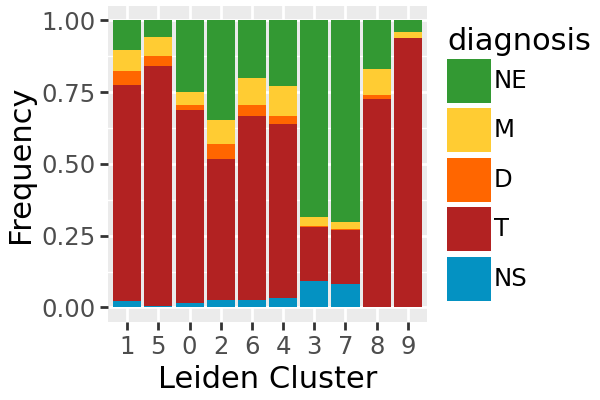

In [22]:
set_matplotlib_formats('svg')
p = pn.ggplot(
    norm_freqs,
    pn.aes(x='leiden', y='frequency', fill='diagnosis')) + pn.geom_bar(stat='identity') \
+ pn.theme(figure_size=(3,2)) + pn.scale_fill_manual(color_dict_diagnosis) + pn.labs(x='Leiden Cluster', y='Frequency')

p.save(f'{plotfolder}/Myeloid_proportions_per_cluster.svg')
p

In [23]:
set_matplotlib_formats('png')

/tmp/ipykernel_149650/2623958728.py:1: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


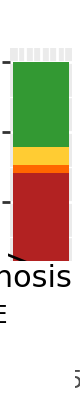

In [24]:
overall_props = A.obs.diagnosis.value_counts()
overall_props = overall_props/overall_props.sum()
overall_props = overall_props.loc[diagnosis_ordered]

_ddd = pd.DataFrame(overall_props).reset_index().rename({'count': 'frequency'}, axis=1)
_ddd.diagnosis = pd.Categorical(_ddd.diagnosis, categories=diagnosis_ordered)

pn.ggplot(
    _ddd,
    pn.aes(x=1, y='frequency', fill='diagnosis')) + pn.geom_bar(stat='identity') \
+ pn.theme(figure_size=(7,2)) + pn.scale_fill_manual(color_dict_diagnosis) + pn.theme(figure_size=(0.4,2)) + pn.labs(x='', y='Frequency')

/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 3 x 1 in image.
/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: /tmp/proportions/Myeloid_proportions//proportions_per_cluster_ncells.svg


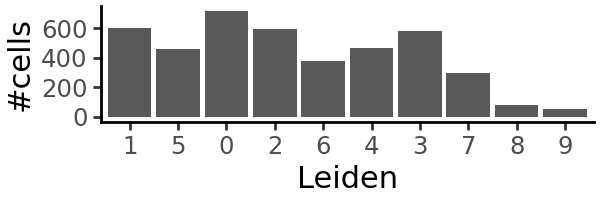

In [25]:
p = pn.ggplot(pd.DataFrame({'n_cells': q.reset_index().melt(id_vars=['leiden']).groupby('leiden').value.sum()}).reset_index(), pn.aes(x='leiden', y='n_cells')) + pn.geom_bar(stat='identity') \
 + pn.theme_classic() + pn.theme(figure_size=(3,1)) + pn.labs(x='Leiden', y='#cells')
p.save(f'{plotfolder}/proportions_per_cluster_ncells.svg')
p

## MCMC

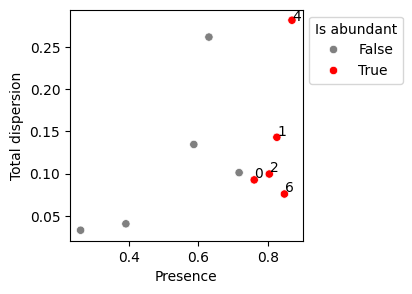

In [26]:
sccoda_model.plot_rel_abundance_dispersion_plot(sccoda_data, figsize=(3,3), abundant_threshold=0.75); plt.show()

In [27]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    # formula="TRG",
    formula="C(diagnosis, Treatment('NE')) + patient + procedure",
    reference_cell_type="6",
)
sccoda_model.run_nuts(sccoda_data, modality_key="coda")
sccoda_data["coda"]

• Zero counts encountered in data! Added a pseudocount of 0.5.


sample: 100%|███████████| 11000/11000 [07:22<00:00, 24.87it/s, 255 steps of size 1.32e-02. acc. prob=0.90]


AnnData object with n_obs × n_vars = 46 × 10
    obs: 'diagnosis', 'samplename', 'patient', 'procedure', 'n_cells'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'
    varm: 'intercept_df', "effect_df_C(diagnosis, Treatment('NE'))[T.M]", "effect_df_C(diagnosis, Treatment('NE'))[T.D]", "effect_df_C(diagnosis, Treatment('NE'))[T.T]", "effect_df_C(diagnosis, Treatment('NE'))[T.NS]", 'effect_df_patient[T.E08]', 'effect_df_patient[T.E11]', 'effect_df_patient[T.E12]', 'effect_df_patient[T.E14]', 'effect_df_patient[T.E17]', 'effect_df_patient[T.E19]', 'effect_df_patient[T.E20]', 'effect_df_patient[T.E21]', 'effect_df_patient[T.E23]', 'effect_df_patient[T.E24]', 'effect_df_patient[T.E26]', 'effect_df_procedure[T.resection]'

In [28]:
sccoda_model.set_fdr(sccoda_data, est_fdr=0.05)
scCODA_result = sccoda_model.get_effect_df(sccoda_data)
scCODA_result['pvalue'] = 1-scCODA_result['Inclusion probability']
scCODA_result['log10pvalue'] = np.log10(scCODA_result['pvalue'])

scCODA_result = annotate_qval_to_scCODA_result(scCODA_result)

scCODA_result.to_csv(f'{plotfolder}/MCMC_diag_procedure_patient.csv')
scCODA_result[scCODA_result['Final Parameter'] != 0]

Final Parameter  HDI 3%  HDI 97%  \
Covariate                        Cell Type                                     
C(diagnosis, Treatment('NE'))T.T 3                -1.073767  -1.880   -0.262   
                                 5                 0.950071   0.375    1.557   
                                 7                -1.010379  -1.794   -0.230   

                                               SD  Inclusion probability  \
Covariate                        Cell Type                                 
C(diagnosis, Treatment('NE'))T.T 3          0.470                 0.9628   
                                 5          0.327                 0.9864   
                                 7          0.443                 0.9621   

                                            Expected Sample  log2-fold change  \
Covariate                        Cell Type                                      
C(diagnosis, Treatment('NE'))T.T 3                 3.994755         -1.512638   
                                 5                16.557170          1.407141   
                                 7                 2.776996         -1.421189   

                                            pvalue  log10pvalue  \
Covariate                        Cell Type                        
C(diagnosis, Treatment('NE'))T.T 3          0.0372    -1.429457   
                                 5          0.0136    -1.866461   
                                 7          0.0379    -1.421361   

                                            Inclusion_probability_soft  \
Covariate                        Cell Type                               
C(diagnosis, Treatment('NE'))T.T 3                              0.9628   
                                 5                              0.9864   
                                 7                              0.9621   

                                              qvalue  
Covariate                        Cell Type            
C(diagnosis, Treatment('NE'))T.T 3          0.025400  
                                 5          0.013600  
                                 7          0.029567

In [29]:
_q = scCODA_result.reset_index()
a = pd.crosstab(_q['Covariate'].replace(renamer),
    _q['Cell Type'], 
    values=_q['log2-fold change']* (_q['Final Parameter'] !=0), aggfunc=np.mean).replace({np.nan: 0})

/tmp/ipykernel_3935694/972804642.py:1: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


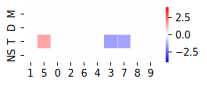

In [30]:
set_matplotlib_formats('svg')

fig, ax = plt.subplots(figsize=(3, 1))
sns.heatmap(a.loc[['M','D','T','NS'], cluster_order], cmap=plt.cm.bwr, vmin=-4, vmax=4)
# plt.title('Log2 fold change (wrt NE)')
plt.xlabel(None)
plt.ylabel(None)
fig.savefig(f'{plotfolder}/matrix_scCODA.svg')

In [31]:
_q = scCODA_result.reset_index()
a = pd.crosstab(_q['Covariate'].replace(renamer),
    _q['Cell Type'], 
    values=_q['log2-fold change'], aggfunc=np.mean).replace({np.nan: 0})
a

Cell Type,0,1,2,3,4,5,6,7,8,9
Covariate,,,,,,,,,,
D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
T,0.036479,0.036479,0.036479,-1.512638,0.036479,1.407141,0.036479,-1.421189,0.036479,0.036479
patientT.E08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
patientT.E11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
patientT.E12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
patientT.E14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
patientT.E17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [32]:
set_matplotlib_formats('png')

/tmp/ipykernel_3935694/2623958728.py:1: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


/tmp/ipykernel_3935694/3154158120.py:1: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


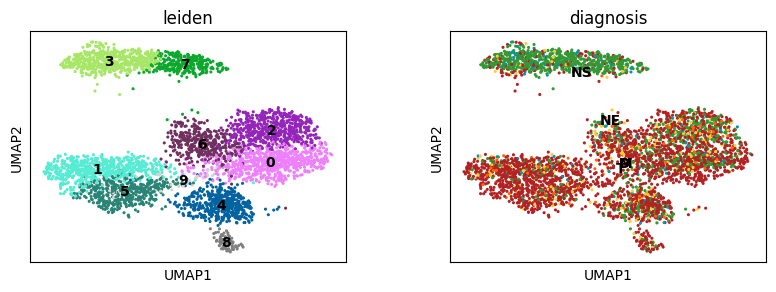

In [33]:
set_matplotlib_formats('png')
sc.pl.umap(A, color=['leiden', 'diagnosis'], legend_loc='on data', size=20)

## Markers

In [34]:
A.raw = A

In [35]:
from sctools.pipeline import differential_expression_michi_kallisto_recipe
differential_expression_michi_kallisto_recipe(A, groupby='leiden', min_in_group_fraction=0.5, max_out_group_fraction=0.5)

02/27/2025 06:53:08 PM doing csr->csc
02/27/2025 06:53:08 PM done csr->csc
02/27/2025 06:53:08 PM Actual DE analysis via `rank_genes_groups`
02/27/2025 06:53:20 PM Done: Actual DE analysis via `rank_genes_groups`
02/27/2025 06:53:20 PM doing csc->csr
02/27/2025 06:53:21 PM done csc->csr
02/27/2025 06:53:21 PM Filtering DE
02/27/2025 06:53:21 PM Done Filtering DE


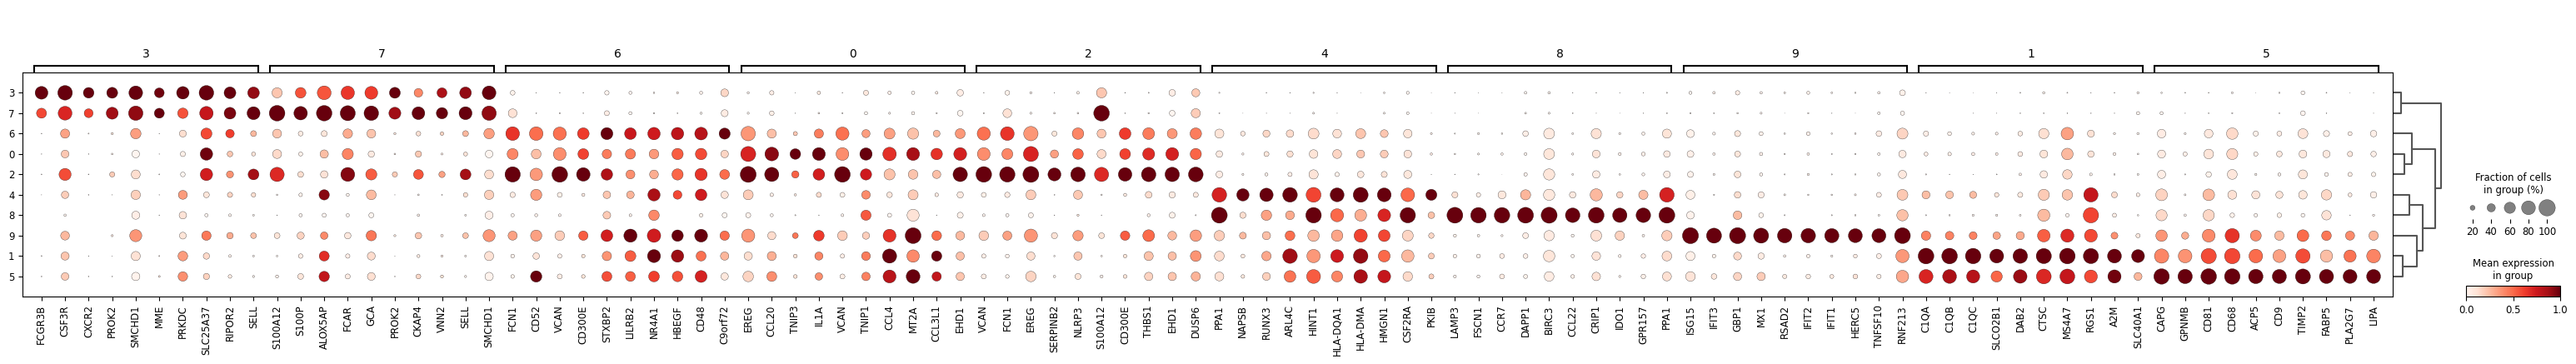

In [36]:
sc.tl.dendrogram(A, groupby='leiden')
sc.pl.rank_genes_groups_dotplot(A, standard_scale='var')

/tmp/ipykernel_3935694/3636727905.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


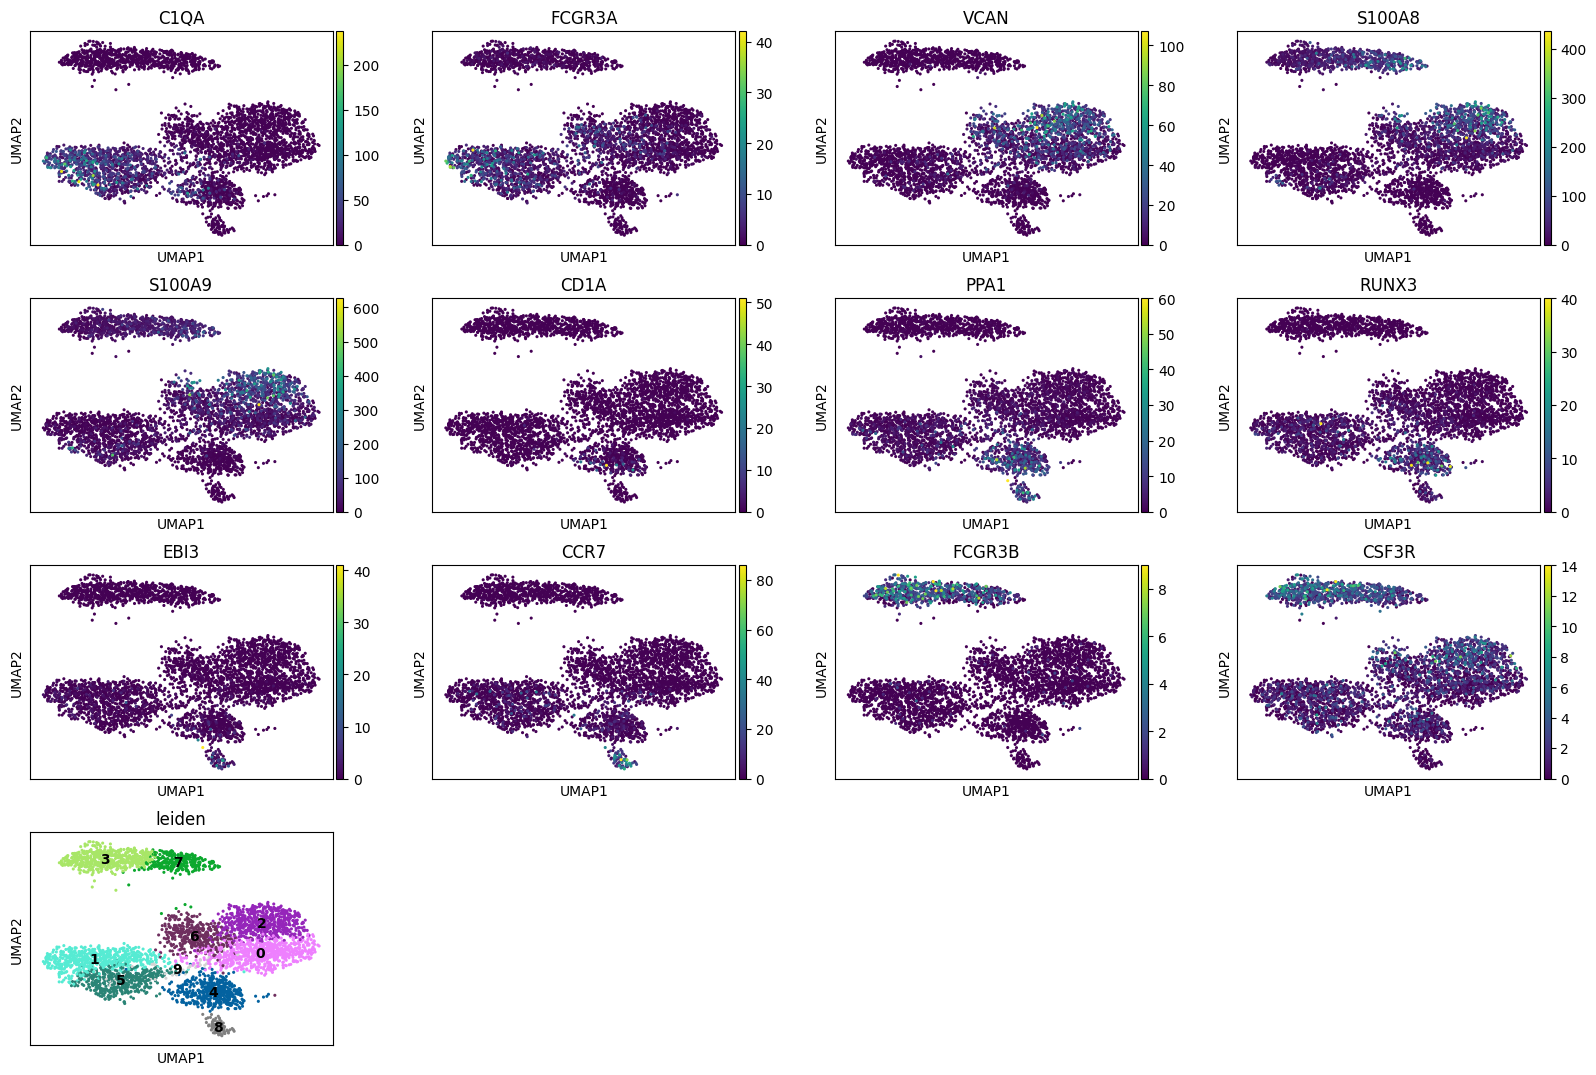

/tmp/ipykernel_3935694/3636727905.py:17: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


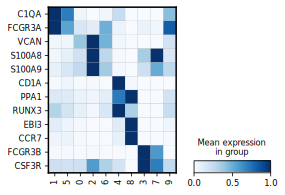

In [37]:
genes =['C1QA', 'FCGR3A',#'MSR1', 'TREM2', # CD68
        'VCAN', 'S100A8', 'S100A9',
        'CD1A',  'PPA1', 'RUNX3',  'EBI3', 'CCR7',
        'FCGR3B','CSF3R', 
       ]
set_matplotlib_formats('png')
sc.pl.umap(A, color=genes+['leiden'], legend_loc='on data', size=20)

B = A.copy()

cluster_order_tmp = ['1','5',  '0','2','6',
                '4', '8',
                '3','7',
                '9']

B.obs['leiden'] = pd.Categorical(B.obs['leiden'], categories=cluster_order_tmp)
set_matplotlib_formats('svg')

sc.pl.matrixplot(B, var_names=genes, groupby='leiden', standard_scale='var', swap_axes=True, show=False, #order=cluster_order
                figsize=(4,3), cmap='Blues')
plt.savefig(f'{plotfolder}/Myeloid_markers_matrix.svg')